In [59]:
import pandas as pd


df_one=pd.read_csv('kaggle_survey_2021_responses.csv')
df_one.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19028\1798301537.py:4: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  df_one=pd.read_csv('kaggle_survey_2021_responses.csv')


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps as cm
cmapl=cm.get_cmap('Blues')
colors1=[]
for i in range(cmapl.N):
    rgb = cmapl(i)[:3]
    colors1.append(rgb2hex(rgb))

cmap2=cm.get_cmap('Reds')
colors2=[]
for i in range(cmap2.N):
    rgb = cmap2(i)[:3]
    colors2.append(rgb2hex(rgb))

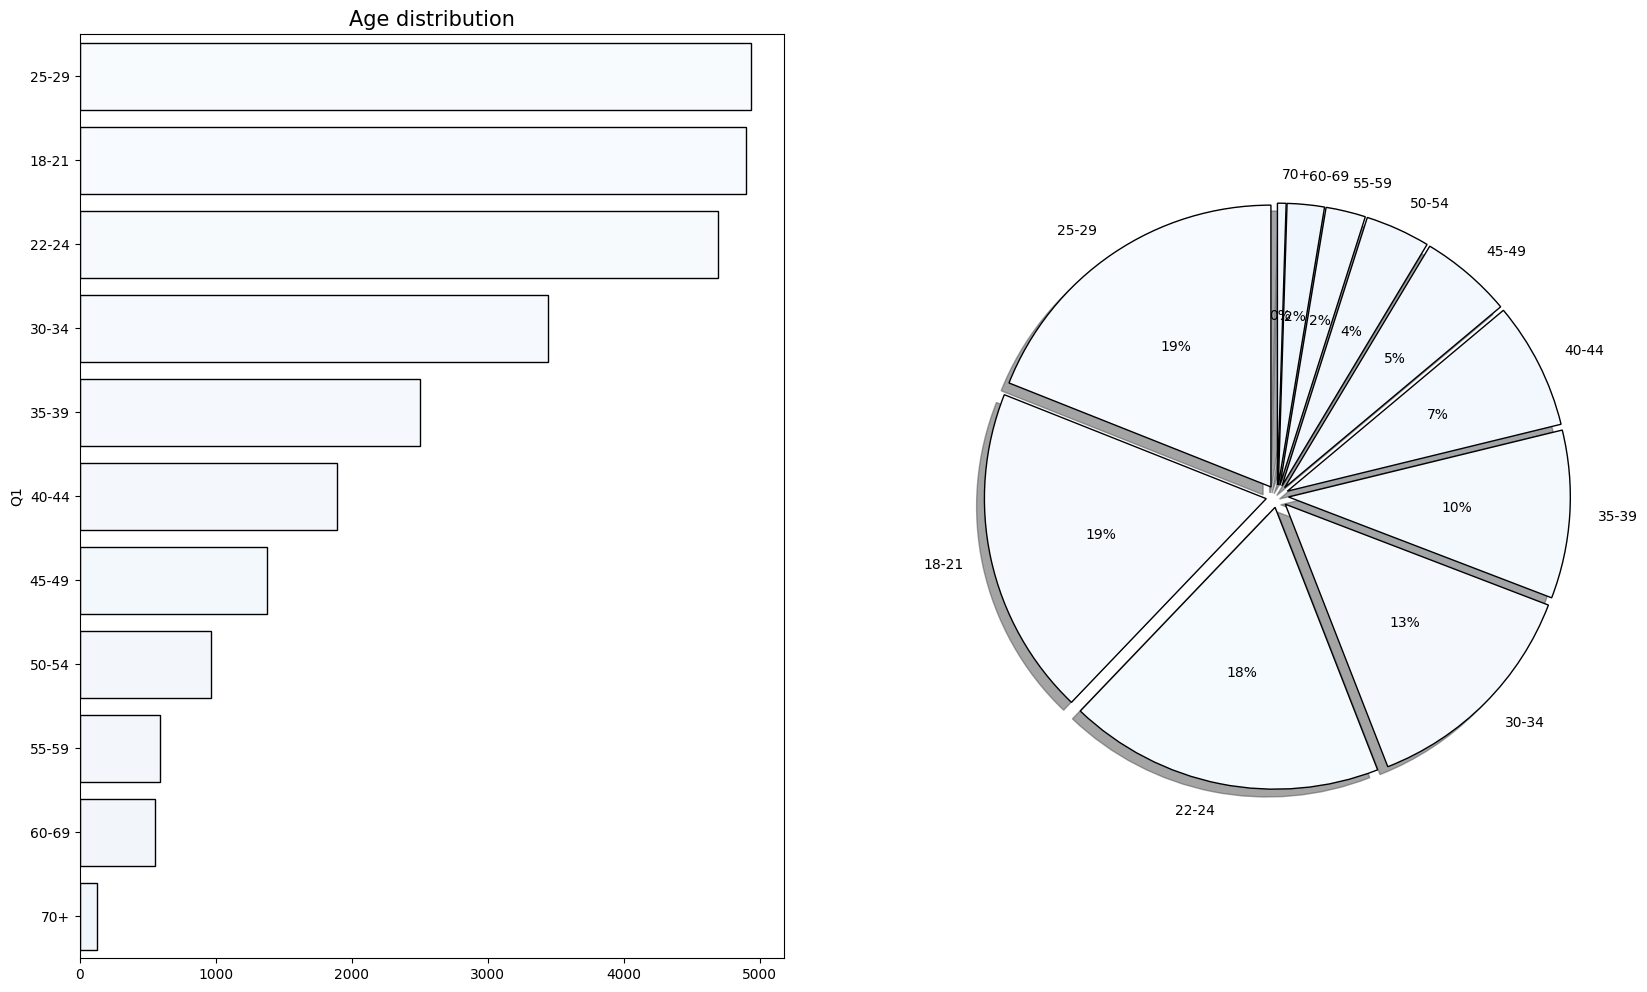

In [61]:
import seaborn as sns
# Age Distribution of survey Participants
fig,ax1 = plt.subplots(1,2,figsize=(20,12))
c_age = df_one['Q1'].value_counts().head(11)
sns.barplot(x=c_age.values,y=c_age.index,palette=colors1,edgecolor='black',ax=ax1[0])
ax1[0].set_title('Age distribution',fontsize=15)
ax1[1].pie(x=c_age,labels=c_age.index,autopct='%.0f%%',colors=colors1,explode=[0.04 for i in c_age.index],shadow=True,startangle = 90,
            wedgeprops = {'linewidth' : 1, 'edgecolor' : "black"})

plt.show()

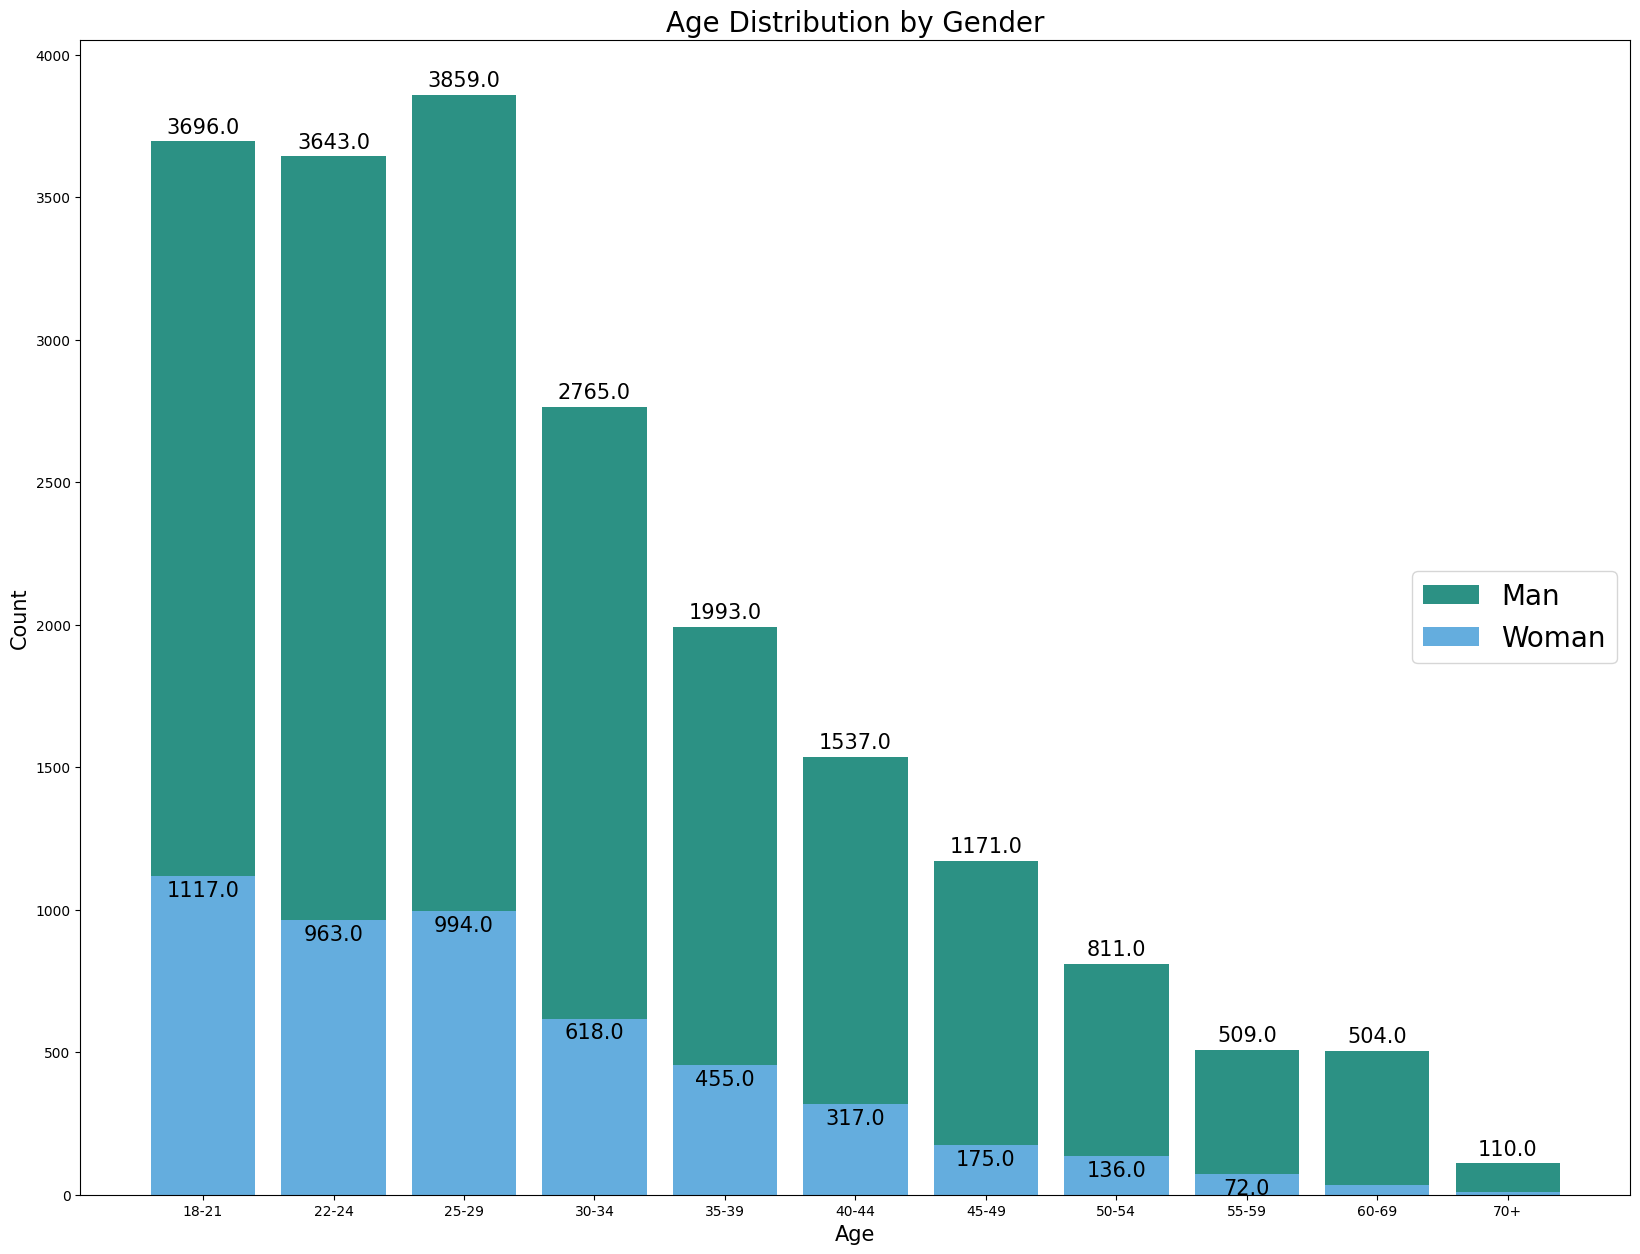

In [62]:
# Age Distribution by Gender
dict1 = {}
for g in df_one['Q2'].value_counts().index:
    dict1[g]= df_one[df_one['Q2']==g]['Q1'].value_counts()
gender_df=pd.DataFrame(dict1)
# plot
figure,ax01=plt.subplots(1,1,figsize=(20,15))
ax01.bar(gender_df.index,gender_df['Man'],color='#2c9184',label='Man')
ax01.bar(gender_df.index,gender_df['Woman'],color='#64ADDE',label='Woman')
for i in gender_df.index:
    ax01.annotate(gender_df['Man'].loc[i],xy=(i,gender_df['Man'].loc[i]+50),ha='center',va='center',fontsize=15)
    ax01.annotate(gender_df['Woman'].loc[i],xy=(i,gender_df['Woman'].loc[i]-50),ha='center',va='center',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Age Distribution by Gender',fontsize=20)
plt.legend(fontsize=20, loc='right')

plt.show()

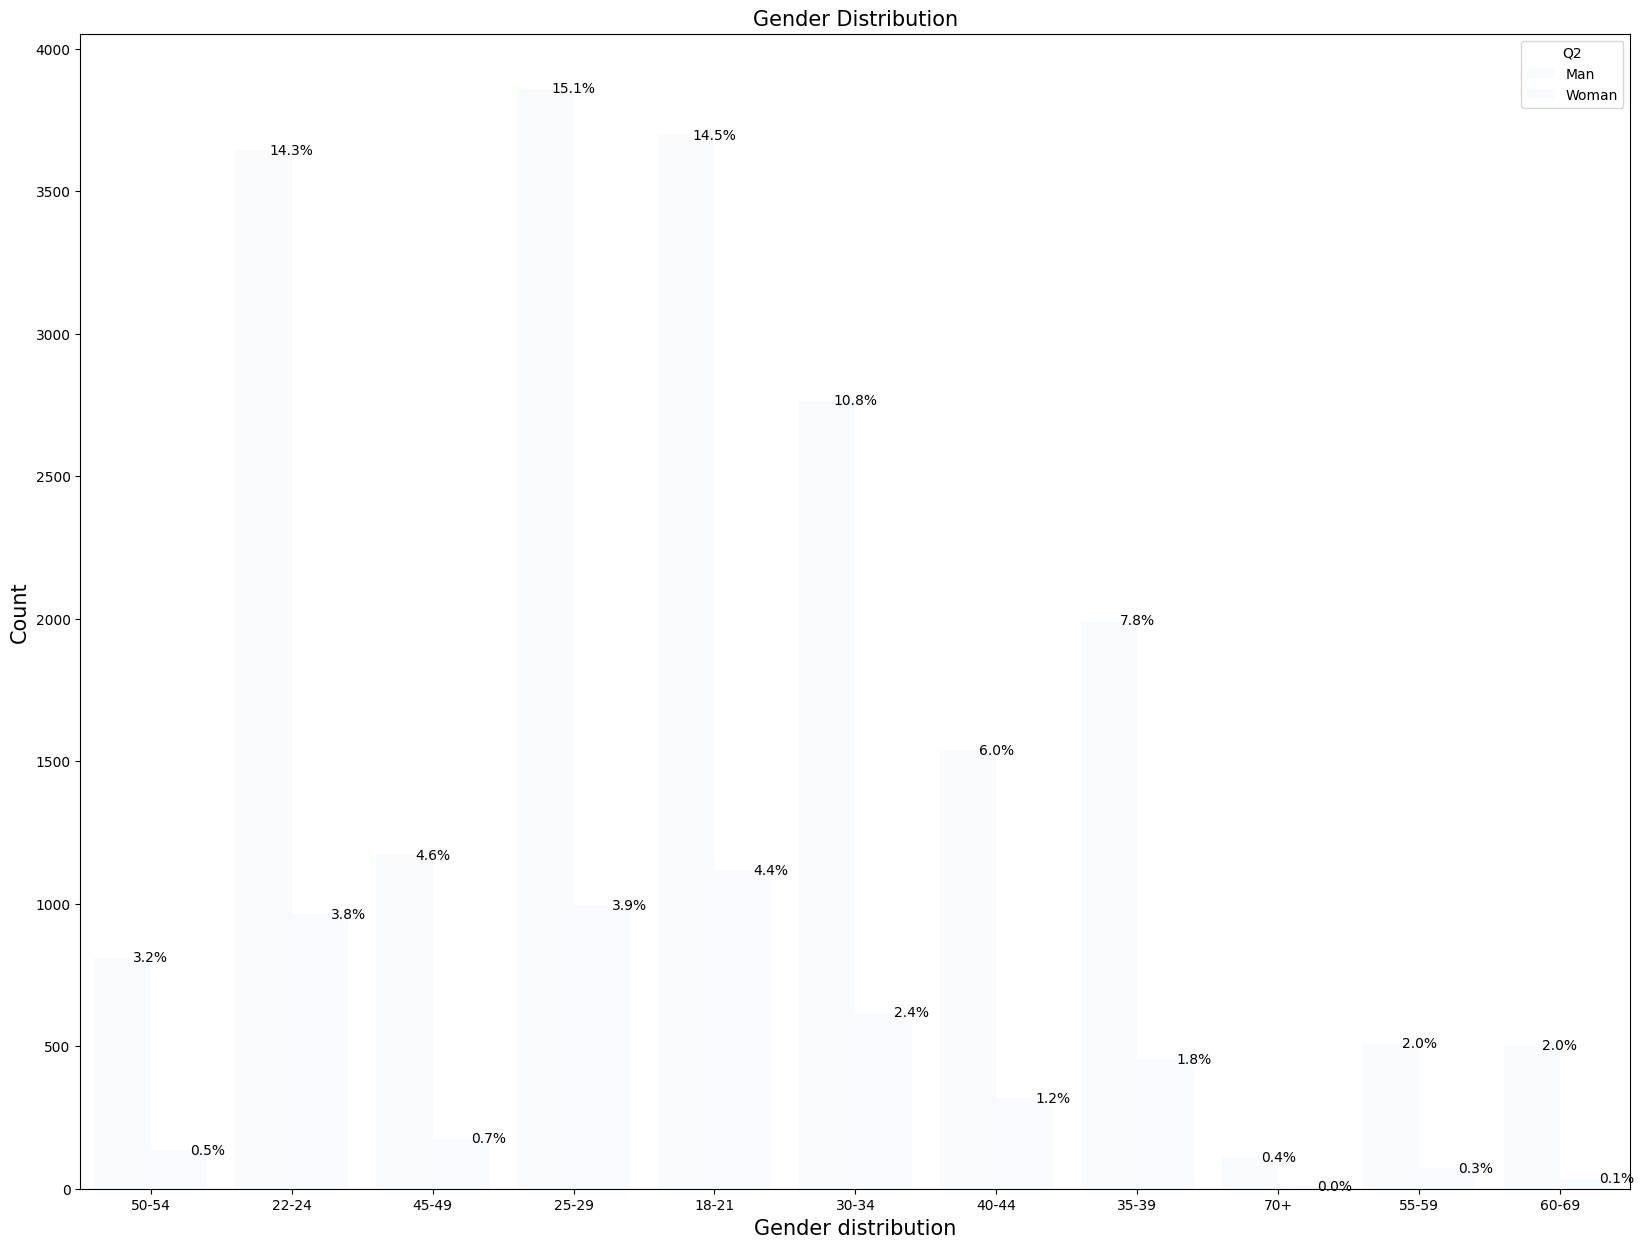

In [63]:
from matplotlib.pyplot import figure
# Percentage of Man and Woman
figure(figsize=(20,15),dpi=100)
data = df_one[df_one["Q2"].isin(["Man","Woman"])]
ax02 = sns.countplot(x="Q1", data=data, hue='Q2',palette=colors1)
plt.title('Gender Distribution', fontsize=15)
for p in ax02.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/float(data.shape[0]))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax02.annotate(percentage, (x, y),ha='center',va='center')
plt.xlabel("Gender distribution",fontsize=15)
plt.ylabel("Count",fontsize=15)

plt.show()

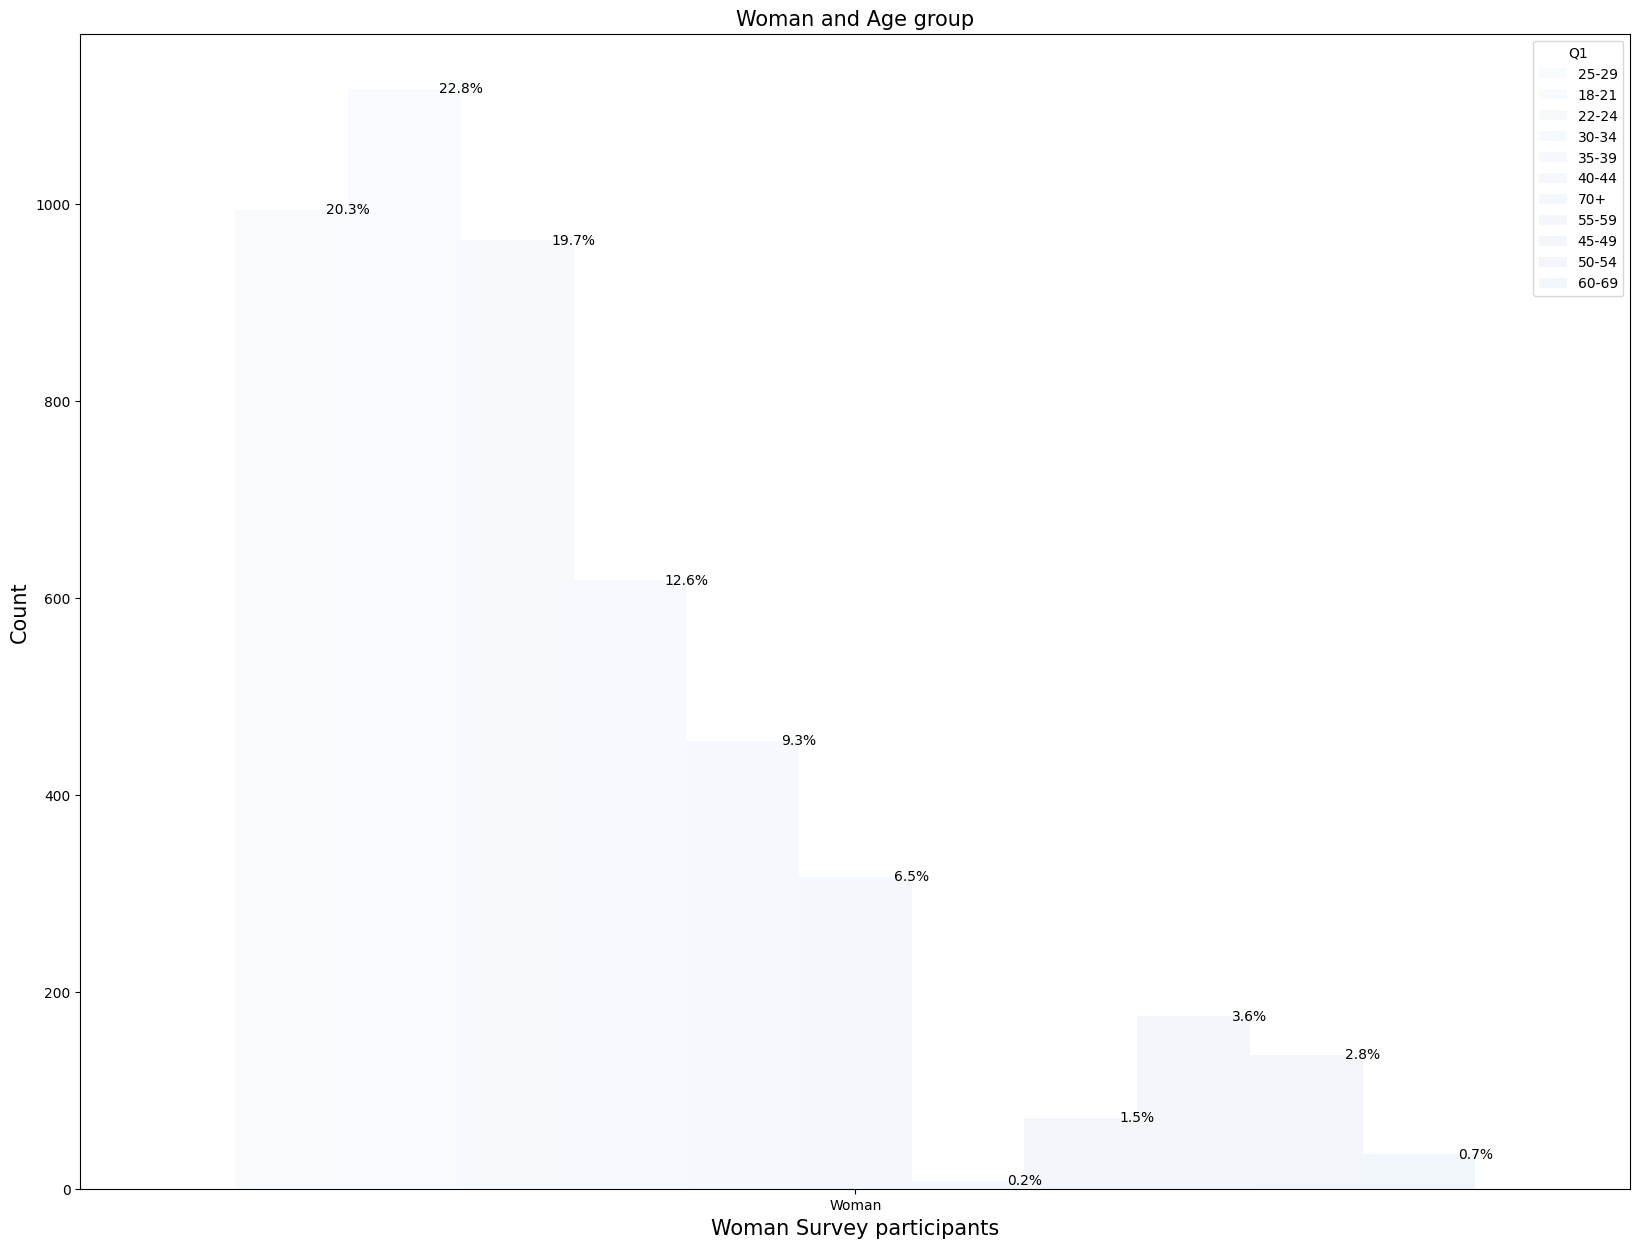

In [64]:
figure(figsize=(20,15),dpi=100)
data = df_one[df_one["Q2"]=="Woman"]
ax03 = sns.countplot(x="Q2", data=data, hue='Q1',palette=colors1)
plt.title('Woman and Age group', fontsize=15)
for p in ax03.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/float(data.shape[0]))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax03.annotate(percentage, (x, y),ha='center',va='center')
plt.xlabel("Woman Survey participants",fontsize=15)
plt.ylabel("Count",fontsize=15)

plt.show()

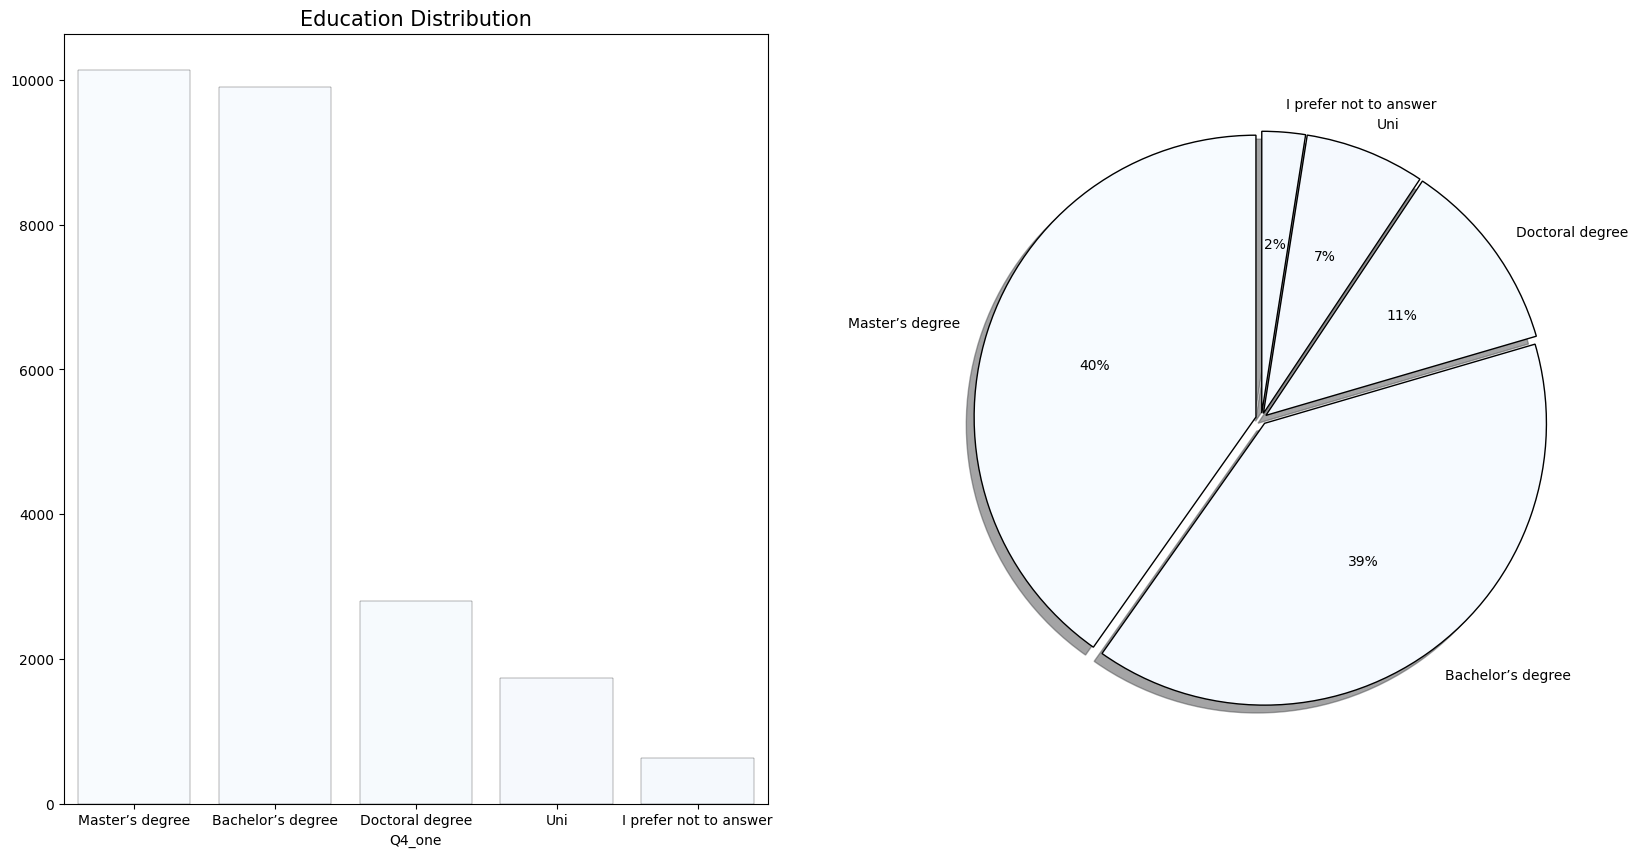

In [65]:
# Education of the survey Participants
    
df_one['Q4_one'] = ["Uni" if i == 'Some college/university study without earning a bachelor’s degree' else i for i in df_one['Q4']]
    
fig,ax2 = plt.subplots(1,2,figsize=(20,10))
c_ed = df_one['Q4_one'].value_counts().head()
sns.barplot(x=c_ed.index,y=c_ed.values,palette=colors1,edgecolor='black',linewidth=0.2,ax=ax2[0])
ax2[0].set_title('Education Distribution',fontsize=15)
ax2[1].pie(x=c_ed,labels=c_ed.index,colors=colors1,autopct='%.0f%%',explode=[0.02 for i in c_ed.index],shadow=True,startangle = 90,
       wedgeprops = {'linewidth' : 1, 'edgecolor' : "black"})

plt.show()

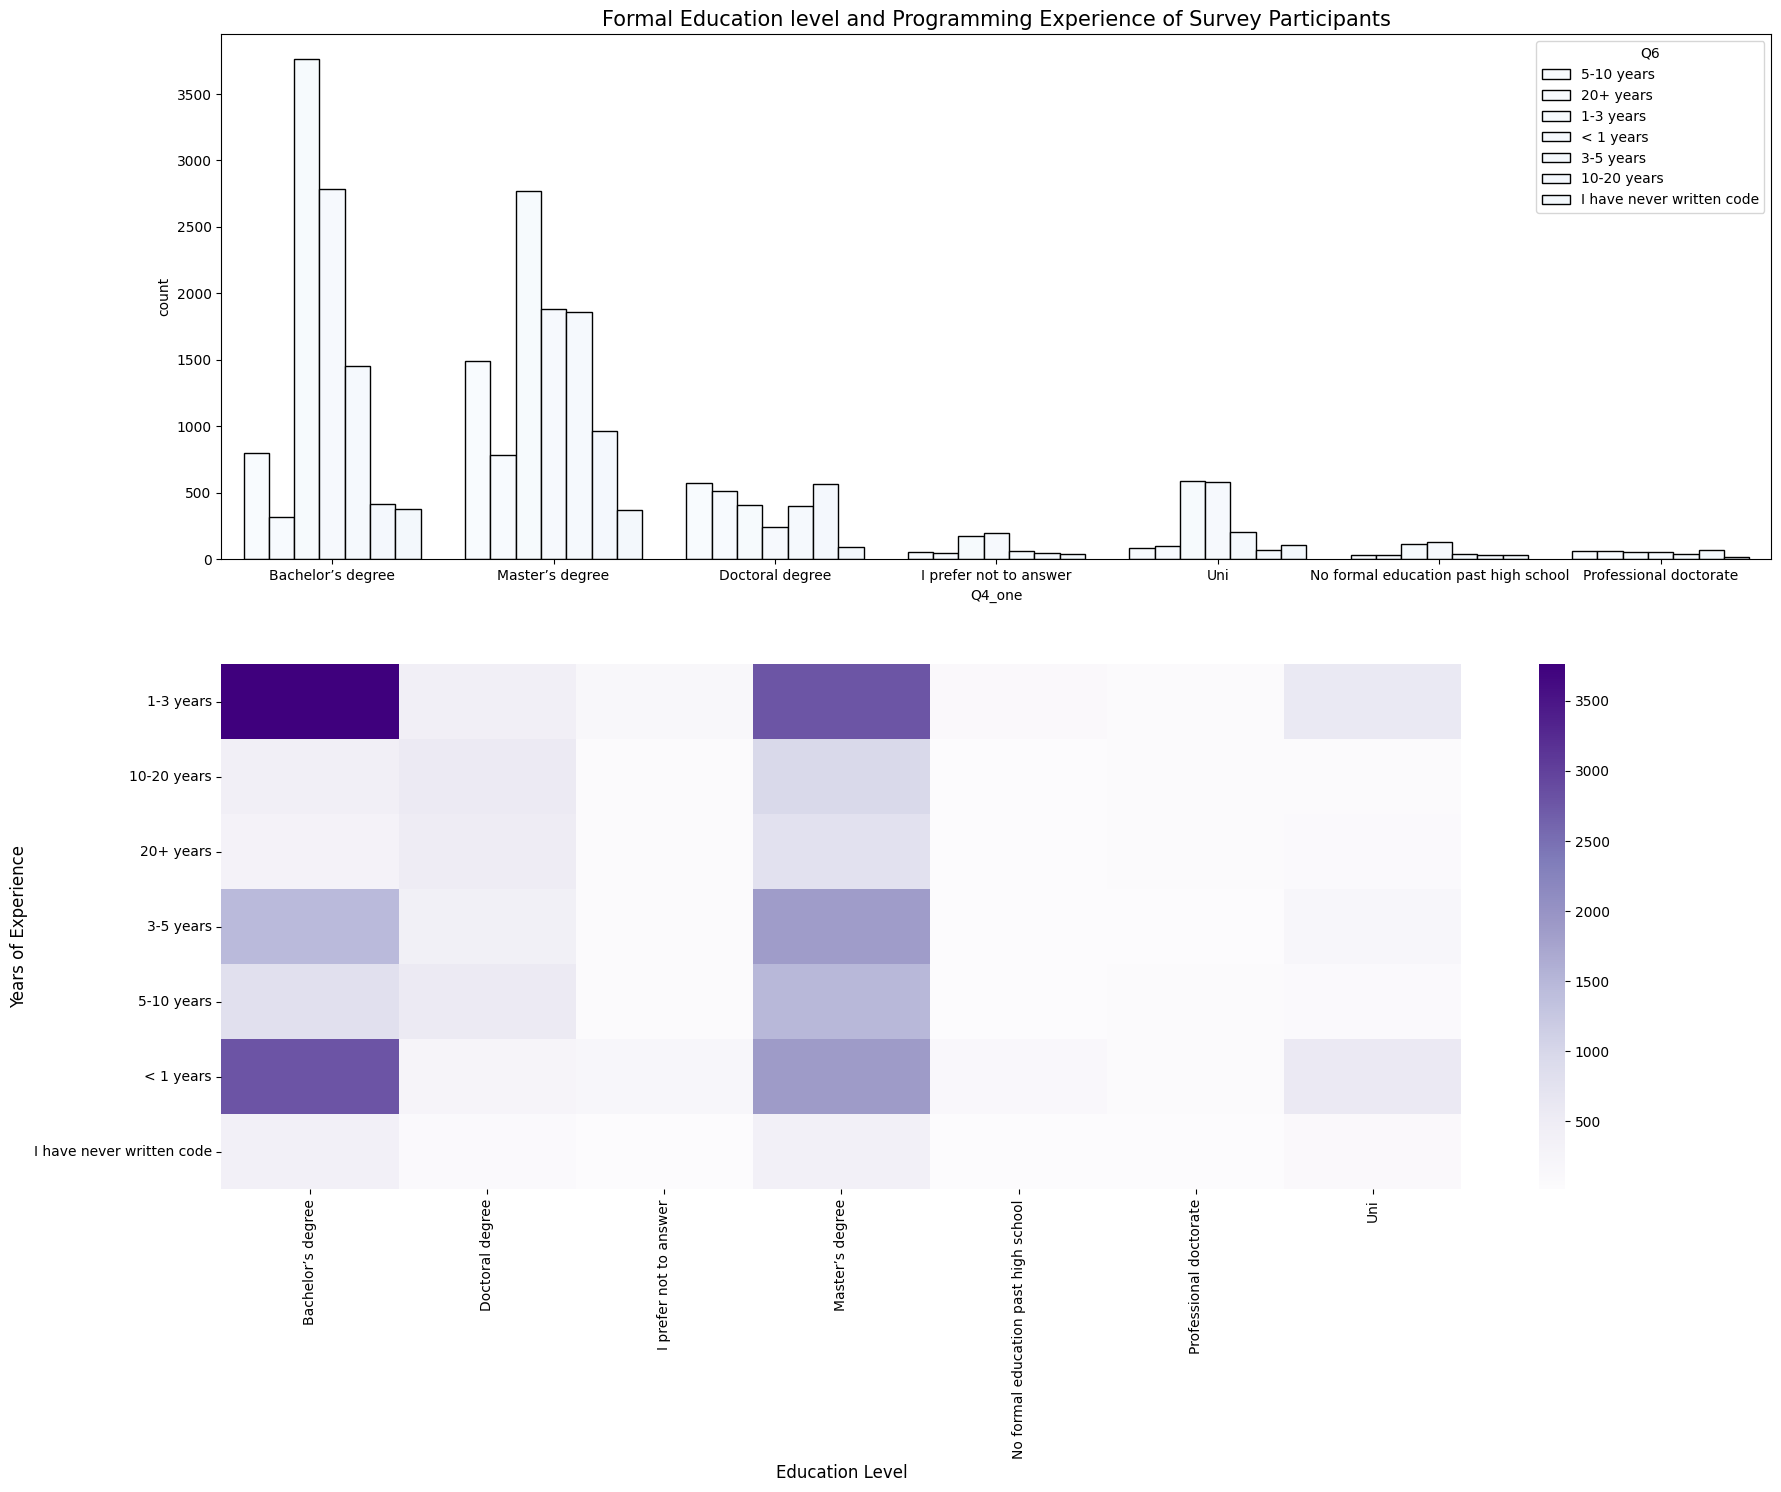

In [66]:
# Formal education level and Programming Experience
df_ans=df_one[1:]
figure,ax8=plt.subplots(2,1,figsize=(20,15))
sns.countplot(x='Q4_one',hue='Q6',ec='black',data=df_ans,ax=ax8[0],palette=colors1)
ax8[0].set_title("Formal Education level and Programming Experience of Survey Participants",fontsize=15)
h2= df_ans.pivot_table(index='Q4_one',columns='Q6',values='Q1',aggfunc='count')
sns.heatmap(h2.T,cmap='Purples',ax=ax8[1])
plt.xlabel('Education Level', fontsize = 12)
plt.ylabel('Years of Experience', fontsize = 12)

plt.show()

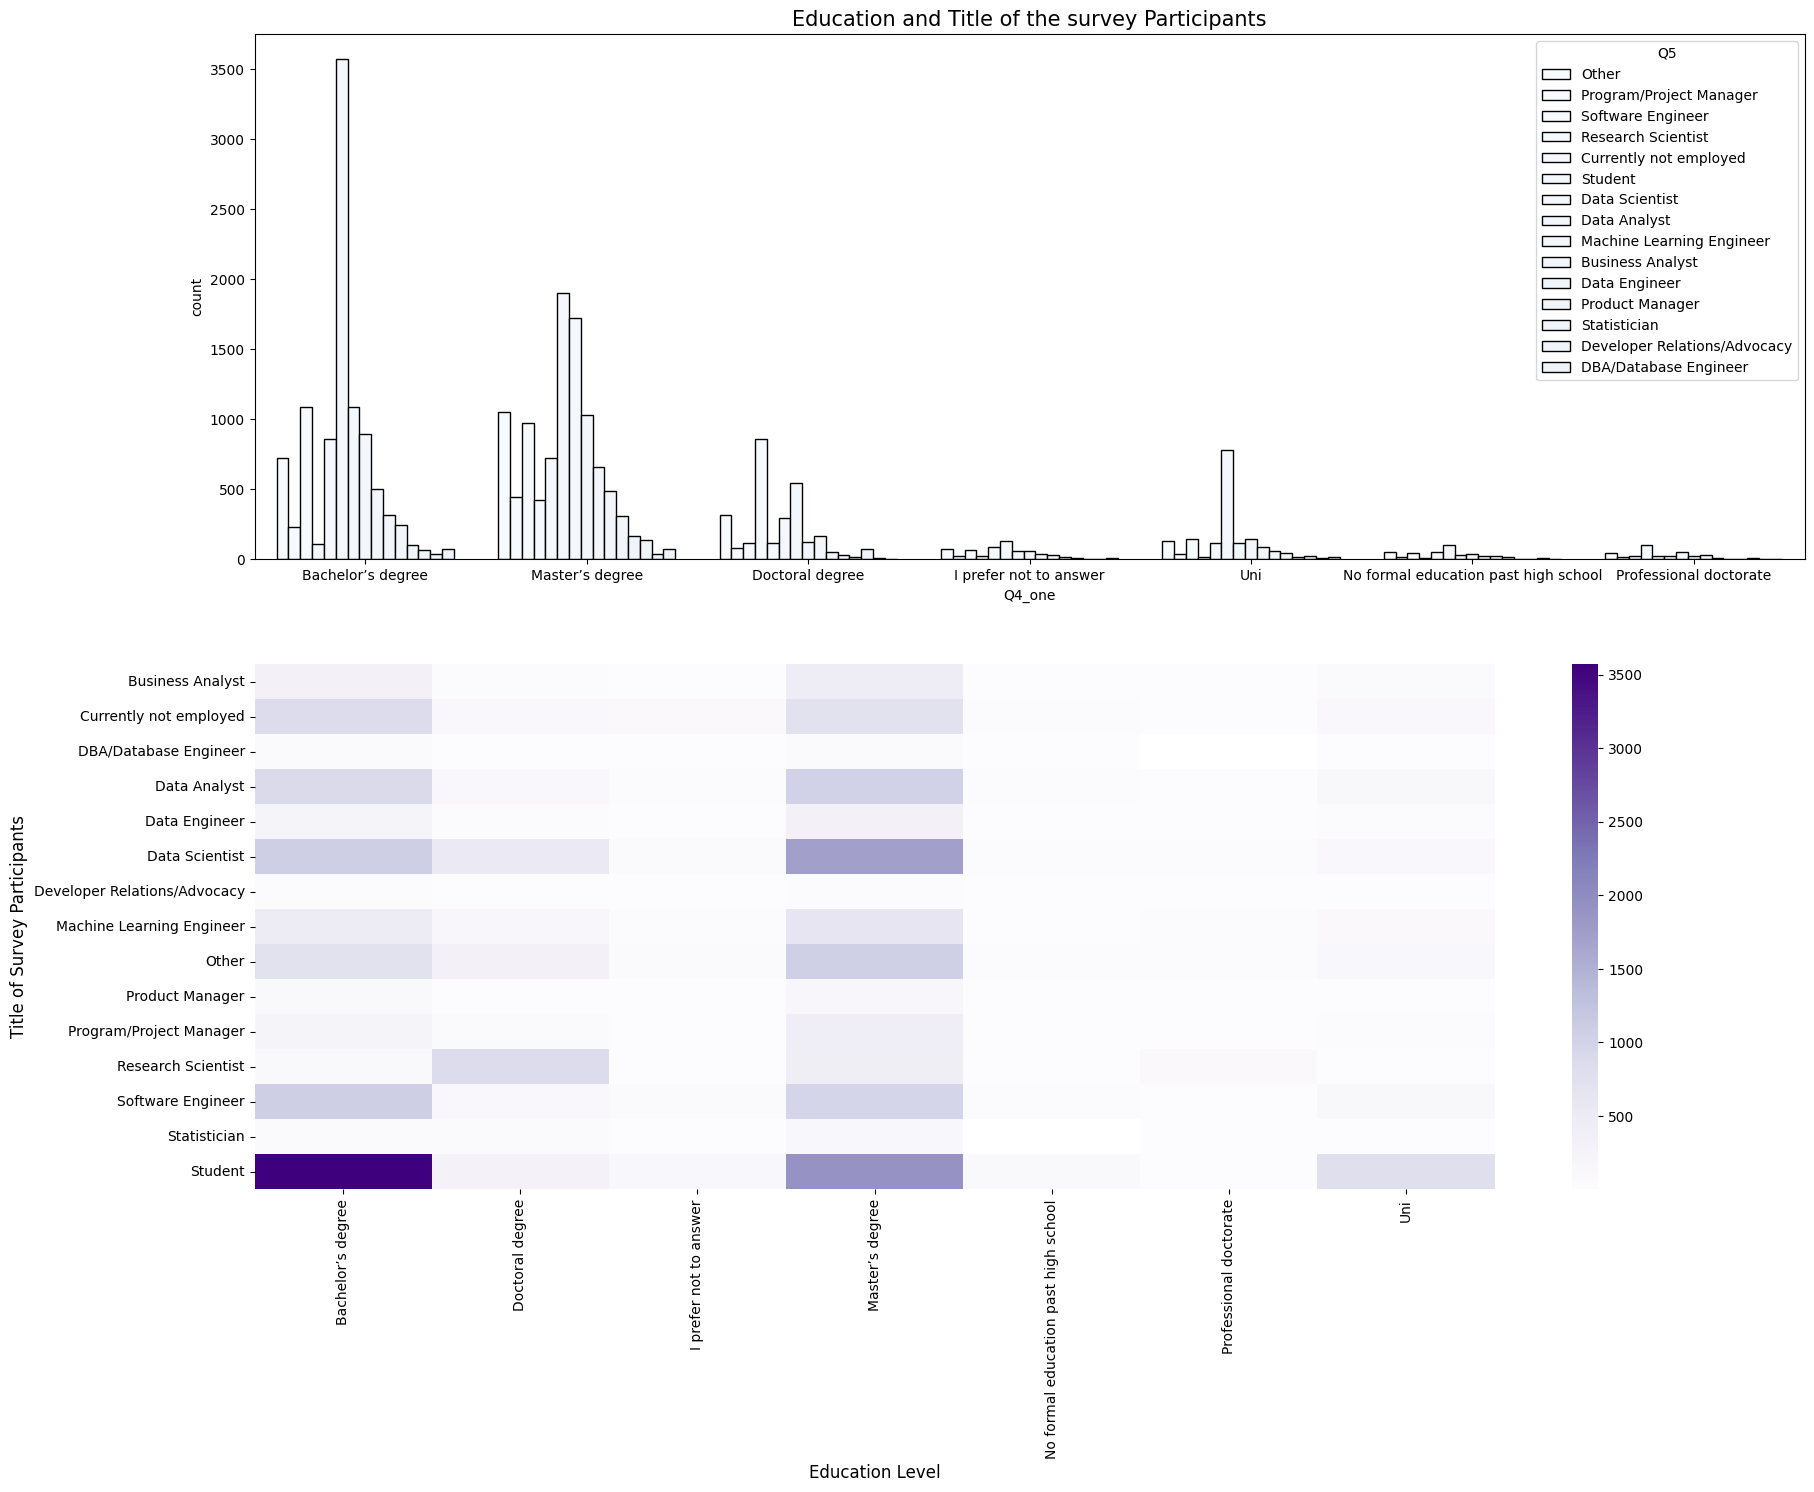

In [67]:
# Education and Title of the survey Participants
fig, ax7 = plt.subplots(2,1,figsize=(20,15))
sns.countplot(x='Q4_one',hue='Q5',ec='black',data=df_ans,ax=ax7[0],palette=colors1)
ax7[0].set_title("Education and Title of the survey Participants",fontsize=15)
h1= df_ans.pivot_table(index='Q4_one',columns='Q5',values='Q1',aggfunc='count')
sns.heatmap(h1.T,cmap='Purples',ax=ax7[1])
plt.xlabel('Education Level', fontsize = 12)
plt.ylabel('Title of Survey Participants', fontsize = 12)
plt.savefig('ETP.png')
plt.show()

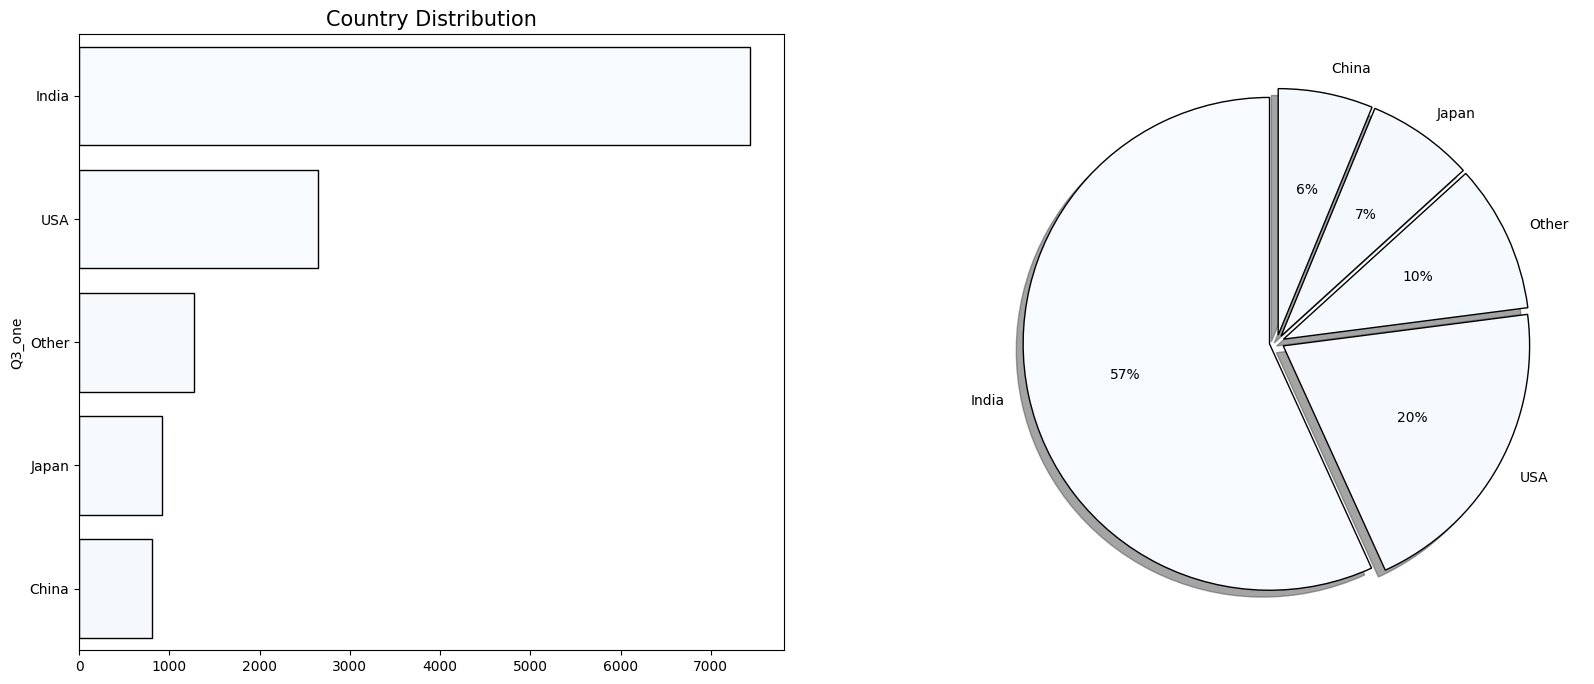

In [71]:
#Country of Survey Participants
df_one['Q3_one'] = ['USA' if i =='United States of America' else i for i in df_one['Q3']]
fig,ax3= plt.subplots(1,2,figsize=(20,8))
c_cntry = df_one['Q3_one'].value_counts().head()
sns.barplot(x=c_cntry.values, y = c_cntry.index,palette=colors1,edgecolor='black',ax=ax3[0])
ax3[0].set_title('Country Distribution',fontsize=15)
ax3[1].pie(x=c_cntry,labels=c_cntry.index,colors=colors1,autopct='%.0f%%',explode=[0.03 for i in c_cntry.index],shadow=True,startangle = 90,wedgeprops = {'linewidth' : 1, 'edgecolor' : "black"})

plt.show()

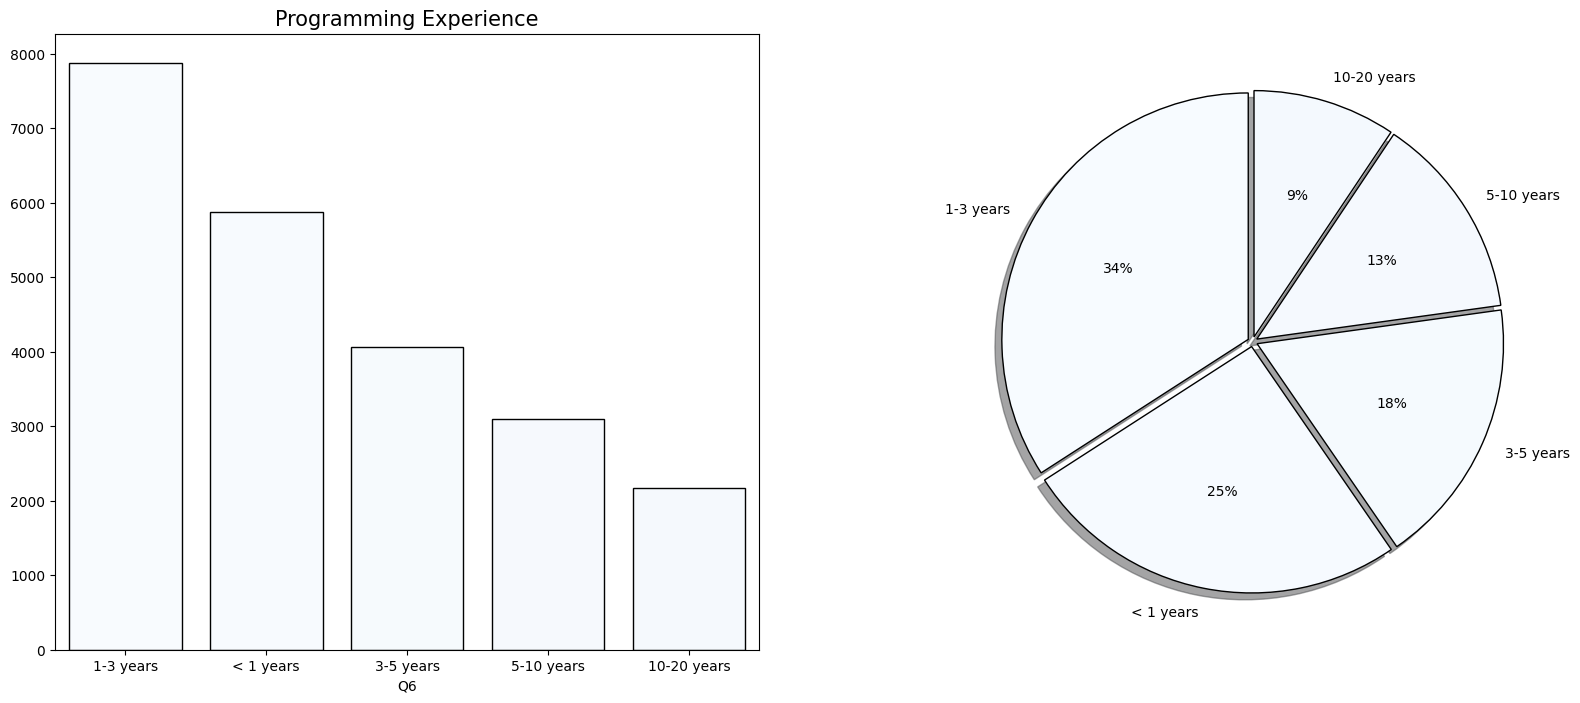

In [72]:
# Experience in Programming
figure,ax4=plt.subplots(1,2,figsize=(20,8))
c_prg = df_one['Q6'].value_counts().head()
sns.barplot(x=c_prg.index,y=c_prg.values,palette=colors1,edgecolor='black',ax=ax4[0])
ax4[0].set_title('Programming Experience',fontsize=15)
ax4[1].pie(x=c_prg,labels=c_prg.index,colors=colors1,autopct='%.0f%%',shadow=True,explode=[0.02 for i in c_prg.index],startangle = 90,
        wedgeprops = {'linewidth' : 1, 'edgecolor' : "black"})

plt.show()

<Figure size 2000x1500 with 0 Axes>

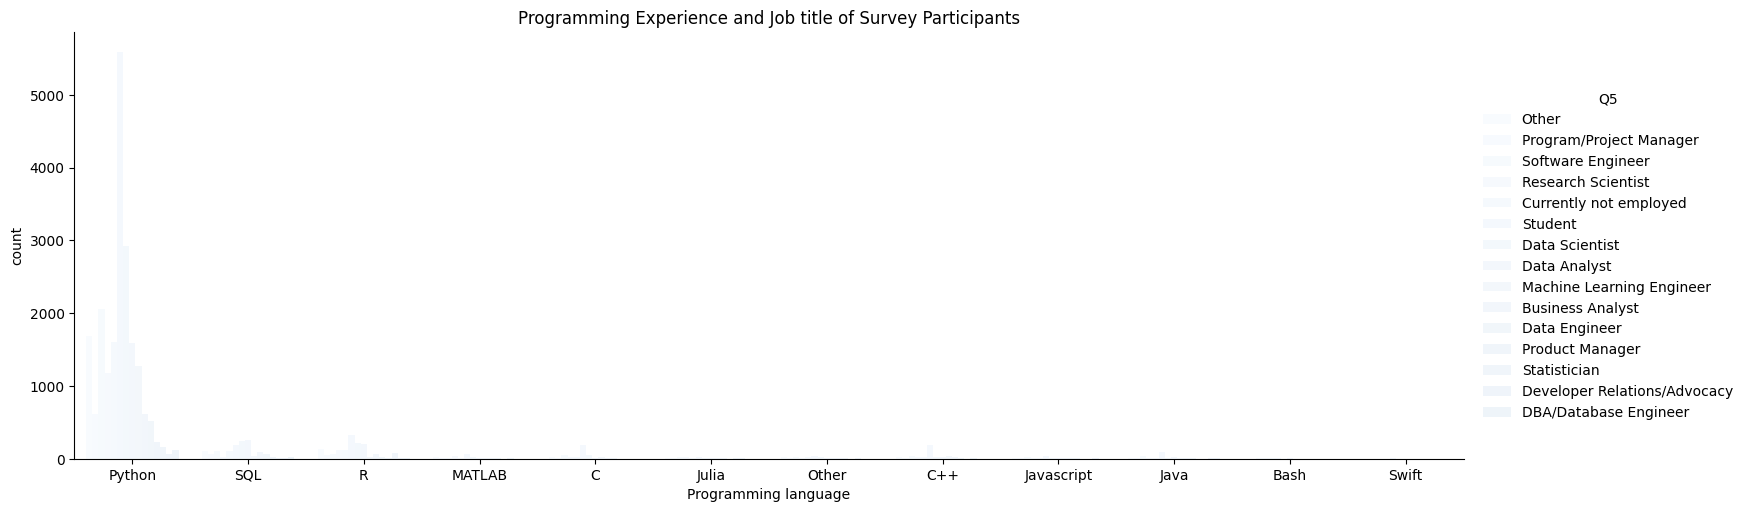

In [74]:
# Programming Experience and Job Title
plt.figure(figsize=(20,15),dpi=100)
sns.catplot(data=df_ans, x='Q8', kind='count', hue='Q5', height=5, aspect=3, palette= colors1 )
plt.xlabel('Programming language')
plt.title('Programming Experience and Job title of Survey Participants')

plt.show()

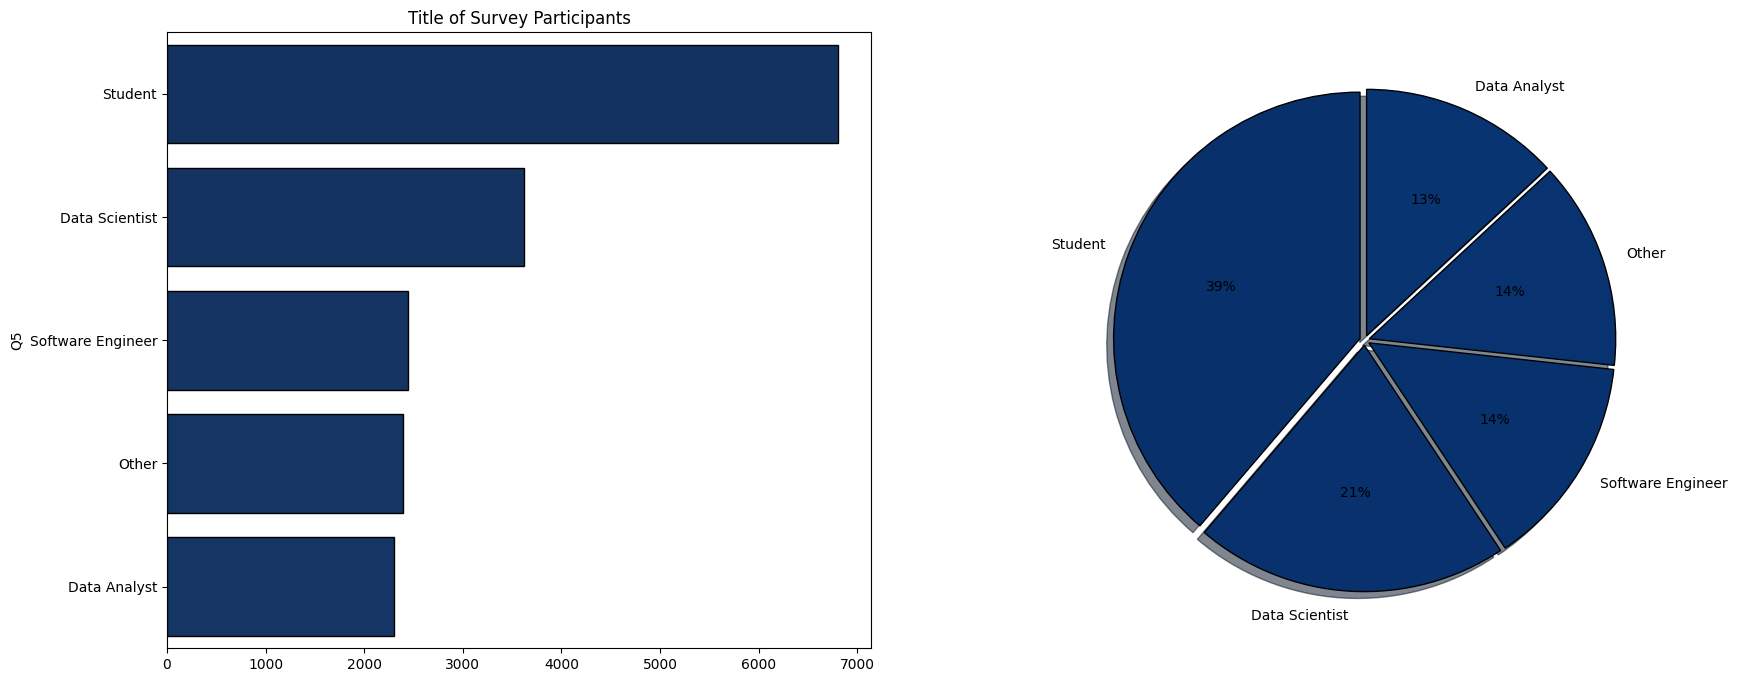

In [75]:
# Title of the Survey Participants
figure,ax5 = plt.subplots(1,2,figsize=(20,8))
c_title = df_one['Q5'].value_counts().head()
sns.barplot(x=c_title.values,y=c_title.index,palette = colors1[::-1], edgecolor='black',ax=ax5[0])
ax5[0].set_title('Title of Survey Participants')
ax5[1].pie(x=c_title,labels=c_title.index,colors=colors1[::-1],autopct='%.0f%%',shadow=True,explode=[0.02 for i in c_title.index],startangle = 90, wedgeprops = {'linewidth' : 1, 'edgecolor' : "black"})
plt.show()

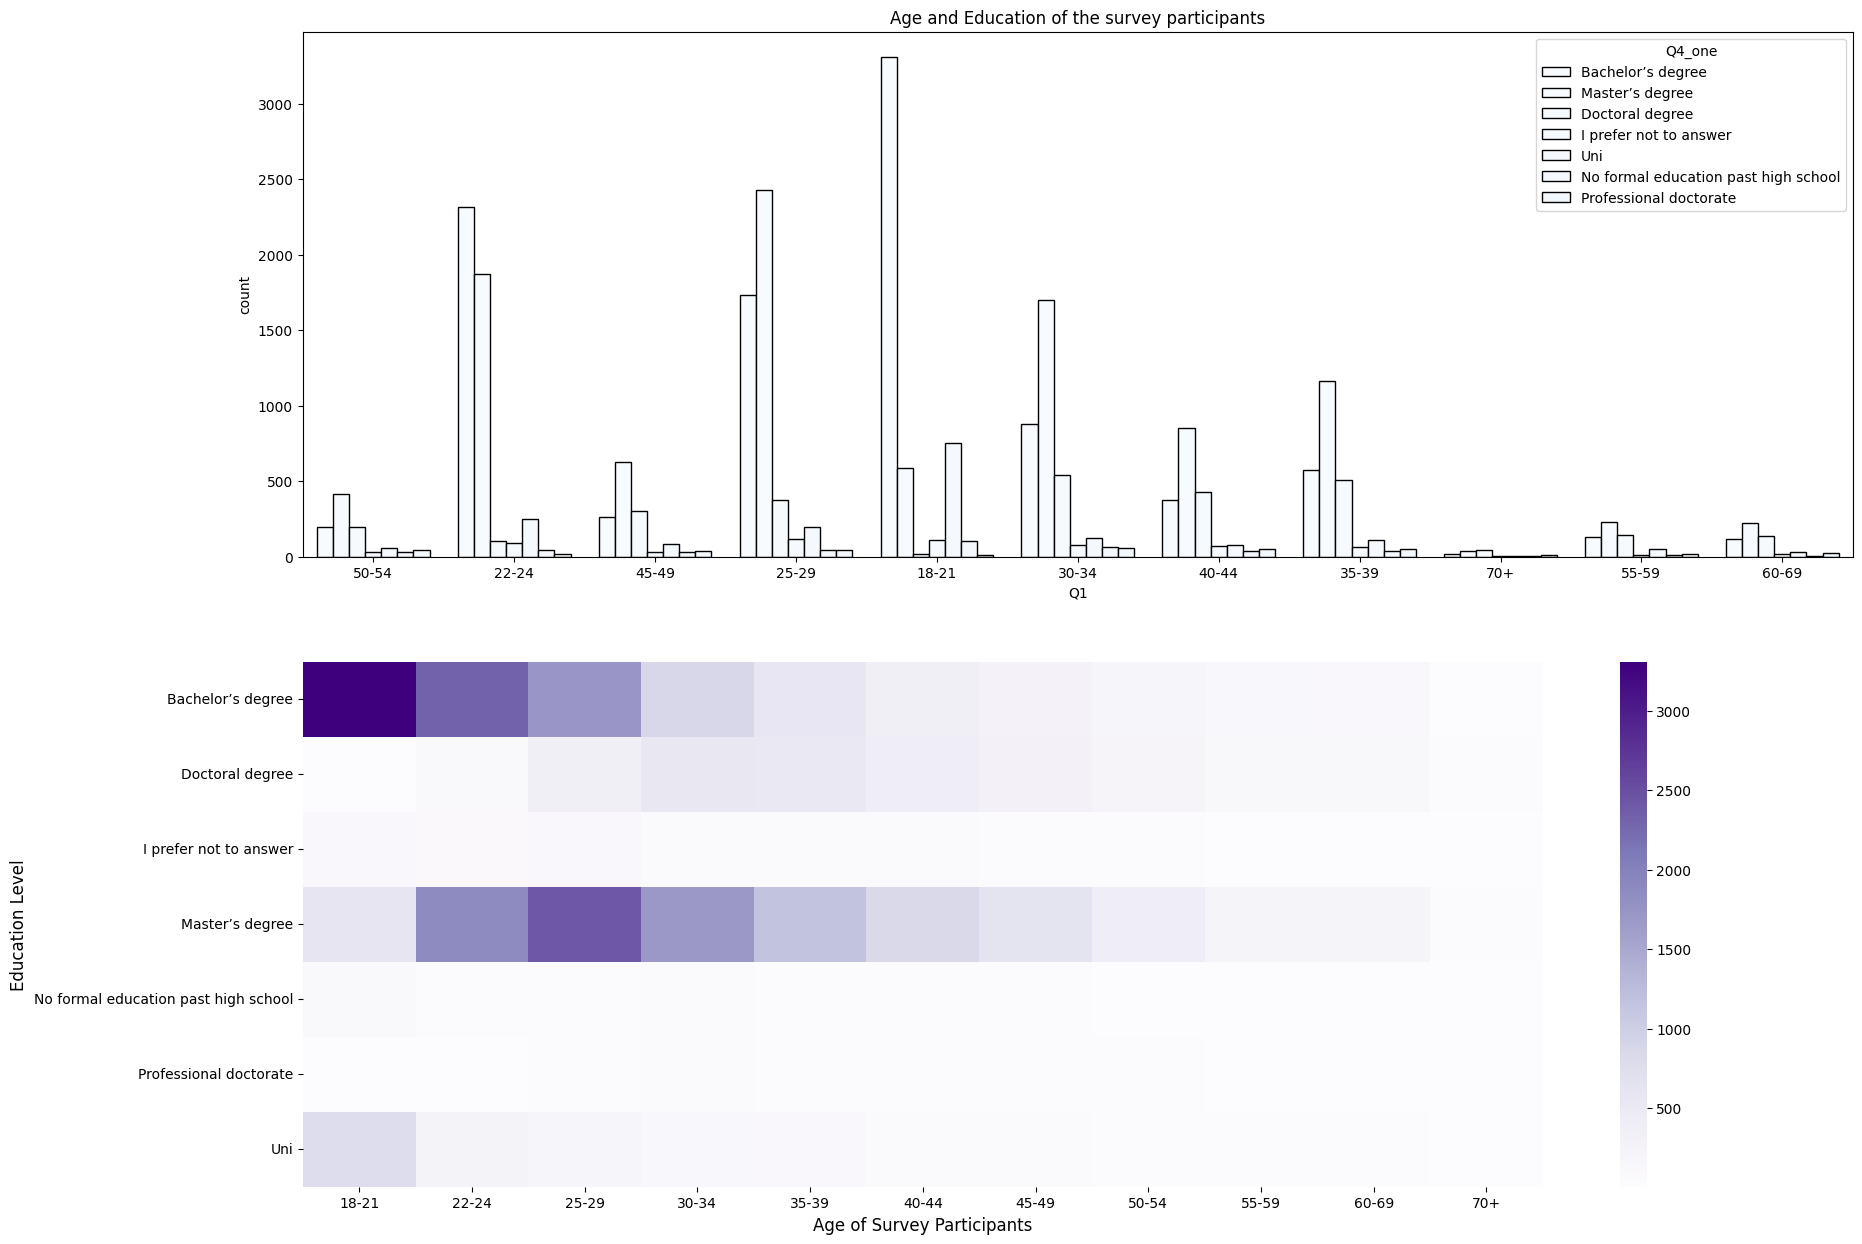

In [76]:
# age of survey participants ( wrt education)
fig,ax6 = plt.subplots(2,1,figsize=(20,15))
df_ans= df_one[1:]
sns.countplot(x='Q1',hue="Q4_one",ec='black',data=df_ans,ax=ax6[0],palette= colors1)
ax6[0].set_title("Age and Education of the survey participants")
h = df_ans.pivot_table(index='Q1',columns='Q4_one',values='Q5',aggfunc='count')
sns.heatmap(h.T,cmap="Purples",ax=ax6[1])
plt.ylabel('Education Level', fontsize = 12)
plt.xlabel('Age of Survey Participants', fontsize = 12)

plt.show()